In [1]:
# Importing libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Fourier Transform of image
def fourier_transform(img):
    f = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)
    f_shift = np.fft.fftshift(f)
    f_complex = f_shift[:,:,0] + 1j*f_shift[:,:,1]
    f_abs = np.abs(f_complex) + 1 # lie between 1 and 1e6
    f_bounded = 20 * np.log(f_abs)
    f_img = 255 * f_bounded / np.max(f_bounded)
    f_img = f_img.astype(np.uint8)
    return f_img

In [3]:
# Plotting image and fourier transform image
def plot_img_and_fimg(images):
    rows = 1
    cols = len(images)
    axes=[]
    fig=plt.figure(figsize=(20,15))

    for a in range(rows*cols):
        fig.add_subplot(rows, cols, a+1)
        plt.axis('off')
        plt.imshow(images[a],cmap='gray')

In [4]:
# Finding if the image is blur or not
# by setting the frequency criteria as 127.5
# and checking if 10% of the values in the 2D matrix
# of fourier image is greater than 127.5 then image 
# is not blur else blur

def blur_or_not(f_img):
    f_img_array = np.array(f_img)
    max_value = np.amax(f_img_array)
    min_value = np.amin(f_img_array)
    # print(type(min_value), max_value)
    freq_count = np.count_nonzero(f_img_array > 100)
    numberofpixels = f_img_array.shape[0]*f_img_array.shape[1]
    # print(freq_count, numberofpixels)
    if(freq_count>(numberofpixels*10)//100):
        print("NOT Blur")
    else:
        print("Blur")
    print(freq_count, numberofpixels,(freq_count/numberofpixels)*100)

NOT Blur
369419 1228800 30.063395182291668


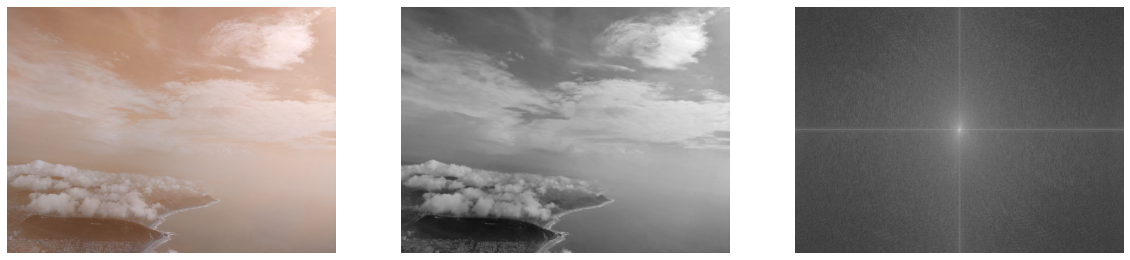

In [5]:
# Read image

o_img = cv2.imread('image2.jpg') # load an image
img = o_img[:,:,2] # blue channel
f_img = fourier_transform(img)
plot_img_and_fimg([o_img,img,f_img])
blur_or_not(f_img)

Blur
108069 1228800 8.794677734375


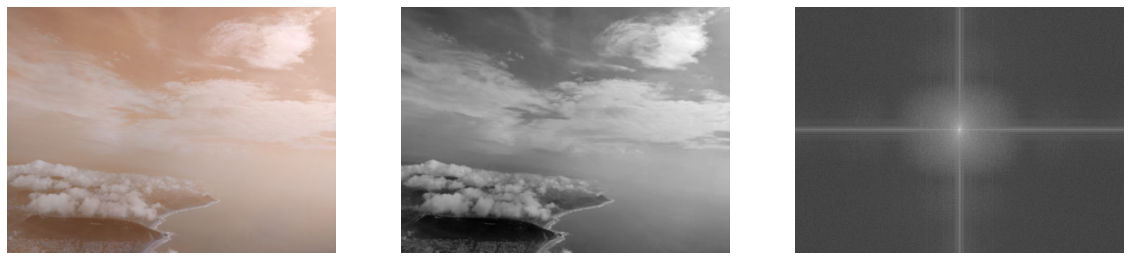

In [6]:
# Blurring the above image

# apply guassian blur on src image
o_img1 = cv2.GaussianBlur(o_img,(5,5),cv2.BORDER_DEFAULT)
b_img1 = cv2.GaussianBlur(img,(5,5),cv2.BORDER_DEFAULT)
f_img = fourier_transform(b_img1)
plot_img_and_fimg([o_img1,b_img1,f_img])
blur_or_not(f_img)
# cv2.imwrite('image2_blur (5).jpg',o_img1)

Blur
60123 1228800 4.892822265625


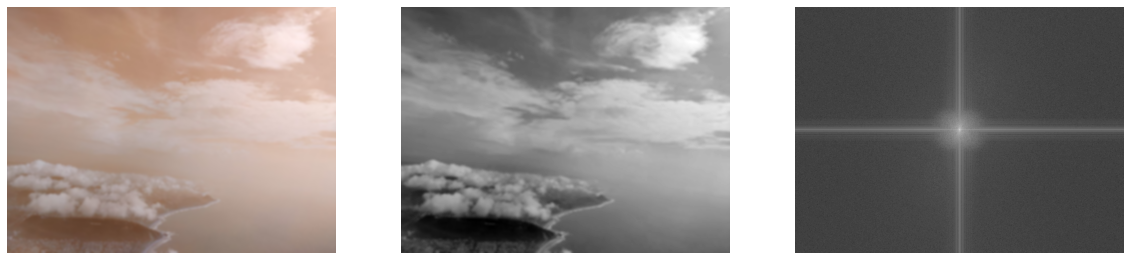

In [7]:
# apply guassian blur on src image
o_img2 = cv2.GaussianBlur(o_img,(15,15),cv2.BORDER_DEFAULT)
b_img2 = cv2.GaussianBlur(img,(15,15),cv2.BORDER_DEFAULT)
f_img = fourier_transform(b_img2)
plot_img_and_fimg([o_img2,b_img2,f_img])
blur_or_not(f_img)
# cv2.imwrite('image2_blur (15).jpg',o_img1)

NOT Blur
3501603 1228800 284.961181640625


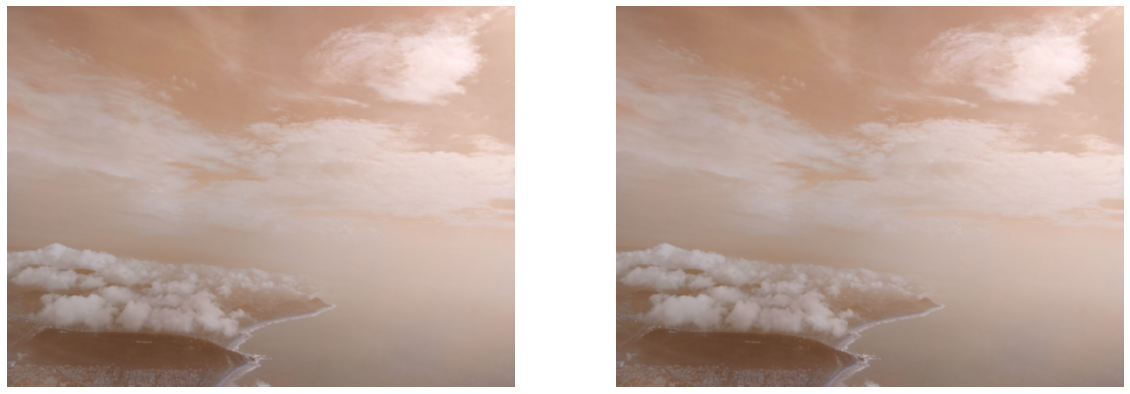

In [8]:
# Deblurring

# Code not working properly
sharpen_kernel = np.array([[0,0,0], [0,1,0], [0,0,0]])
sharpen = cv2.filter2D(o_img1, -1, sharpen_kernel)
plot_img_and_fimg([o_img1,sharpen])
blur_or_not(sharpen)